In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
pd.set_option('display.max_columns',300)

In [ ]:
df = pd.read_csv(r'C:\Users\madag\Downloads\Compressed\archive\SBAnational.csv',low_memory=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [ ]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0


In [ ]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,8.862400e+05,886240.000000,886240.000000,886240,886240.000000,886240.000000,886240.000000,886240.000000,886240.000000,886240.000000,886240.000000,160871,886240,8.862400e+05,886240.000000,8.862400e+05,8.862400e+05,8.862400e+05
mean,4.764531e+09,53863.829072,399251.824562,2001-06-06 08:12:30.059577856,110.954647,11.420650,1.279900,8.463092,10.842406,2762.323810,0.759725,2008-07-07 07:30:25.141883136,2001-09-27 13:18:12.706264448,2.021419e+05,3.032943,1.359378e+04,1.934997e+05,1.499839e+05
min,1.000014e+09,0.000000,0.000000,1974-01-09 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1988-10-03 00:00:00,1974-01-07 00:00:00,4.000000e+03,0.000000,0.000000e+00,1.000000e+03,5.000000e+02
25%,2.577612e+09,27610.000000,235310.000000,1996-12-20 00:00:00,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2007-09-04 00:00:00,1997-06-13 00:00:00,4.283700e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,4.351670e+09,55416.000000,445310.000000,2002-09-30 00:00:00,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2009-12-01 00:00:00,2003-01-15 00:00:00,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.212550e+04
75%,6.878439e+09,83709.000000,561740.000000,2006-01-12 00:00:00,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2011-03-09 00:00:00,2006-03-31 00:00:00,2.400000e+05,0.000000,0.000000e+00,2.270000e+05,1.750000e+05
max,9.996003e+09,99999.000000,928120.000000,2073-12-20 00:00:00,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,2026-10-22 00:00:00,2073-12-24 00:00:00,1.144632e+07,996262.000000,3.512596e+06,5.000000e+06,4.500000e+06
std,2.539319e+09,31183.864500,263211.592441,NaN,78.990583,74.187995,0.451509,237.301746,237.739546,12776.276419,0.646074,NaN,NaN,2.879380e+05,1452.639312,6.546616e+04,2.835053e+05,2.281694e+05


In [ ]:
df.select_dtypes(exclude=[int])

,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NewExist,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,FIFTH THIRD BANK,OH,28-Feb-97,1997,2.0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,1ST SOURCE BANK,IN,28-Feb-97,1997,2.0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,28-Feb-97,1997,1.0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,28-Feb-97,1997,1.0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,28-Feb-97,1997,1.0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,FABRIC FARMS,UPPER ARLINGTON,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,27-Feb-97,1997,1.0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,FABRIC FARMS,COLUMBUS,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,27-Feb-97,1997,1.0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,"RABOBANK, NATIONAL ASSOCIATION",CA,27-Feb-97,1997,1.0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,"MARUTAMA HAWAII, INC.",HONOLULU,HI,BANK OF HAWAII,HI,27-Feb-97,1997,1.0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [ ]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
df.dropna(subset=['Name', 'Bank', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)

In [ ]:
#for col in df.select_dtypes('number'):
#  df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.sample(20)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
806958,8648014008,MARGARET'S CATERING SERVICE,HUNTSVILLE,AL,35806,BBCN BANK,CA,722110,25-Feb-05,2005,52,1,1.0,1,1,1,1,0,N,29-Jan-08,28-Feb-05,5000.0,0.0,P I F,4767.0,5000.0,4250.0
572681,5647803007,M&M ENTERPRISES,JACKSON,TN,38301,REGIONS BANK,TN,332813,15-Apr-93,1993,180,5,1.0,0,0,1,0,N,N,NaN,30-Apr-93,200000.0,0.0,P I F,0.0,204000.0,163200.0
809134,8670223001,"COMMERCIAL DELIVERY, INC.",DETROIT,MI,48212,"FIRSTMERIT BANK, N.A.",OH,0,21-Sep-95,1995,216,1,1.0,0,0,1,0,N,N,NaN,31-Jan-96,155000.0,0.0,P I F,0.0,155000.0,139500.0
798169,8534843005,BOOMERS SMOKEHOUSE,LAWRENCE,KS,66047,COMMERCE BANK,KS,0,24-Jul-95,1995,16,15,2.0,0,0,1,0,N,Y,8-Jun-99,31-Oct-95,69800.0,0.0,CHGOFF,39274.0,70000.0,63000.0
164772,2187526010,TOMET MANUFACTURING,ROCKWALL,TX,75087,PROSPER BANK,TX,332710,28-Jun-06,2006,97,28,1.0,0,28,1,1,0,N,25-May-11,31-Jul-06,747000.0,0.0,CHGOFF,644541.0,747000.0,560250.0
459374,4442744000,JAPANESE YUMMY YUMMY,NEW YORK,NY,10013,BANK OF AMERICA NATL ASSOC,RI,445292,13-Apr-01,2001,87,5,1.0,2,0,1,1,0,N,NaN,31-Oct-01,120000.0,0.0,P I F,0.0,120000.0,60000.0
139630,2020135002,"SPH INVESTMENTS, LLC",DE BEQUE,CO,81630,STEARNS BK NATL ASSOC,MN,236220,15-Sep-06,2006,240,15,2.0,0,15,0,2,N,N,NaN,30-Sep-06,167200.0,0.0,P I F,0.0,167200.0,125400.0
713313,7421734002,GENOAH DESIGNS INC,SUNNY ISLES BEACH,FL,33160,"CITIBANK, N.A.",FL,541410,10-May-04,2004,72,2,1.0,0,2,1,2,Y,N,NaN,30-Jun-04,50689.0,0.0,P I F,0.0,35000.0,17500.0
820894,8809574003,K & K LIMO SERVICE CORP,FLUSHING,NY,11354,HSBC BK USA NATL ASSOC,VA,485320,21-Apr-05,2005,32,4,1.0,2,4,1,1,Y,N,29-Oct-09,31-May-05,75806.0,0.0,CHGOFF,47279.0,50000.0,25000.0
821047,8811823009,SUNNYSIDE UP DAY NURSERY & KIN,BIRMINGHAM,AL,35208,"PNC BANK, NATIONAL ASSOCIATION",AL,624410,20-Nov-95,1996,180,12,2.0,0,0,1,0,N,Y,NaN,30-Sep-96,80000.0,0.0,P I F,0.0,80000.0,64000.0


In [ ]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = \
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

In [ ]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].astype(float)

In [ ]:
pd.to_datetime(df['ApprovalDate'])

C:\Users\madag\AppData\Local\Temp\ipykernel_34680\3834009144.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['ApprovalDate'])


0        1997-02-28
1        1997-02-28
2        1997-02-28
3        1997-02-28
4        1997-02-28
            ...    
899159   1997-02-27
899160   1997-02-27
899161   1997-02-27
899162   1997-02-27
899163   1997-02-27
Name: ApprovalDate, Length: 899164, dtype: datetime64[ns]

In [ ]:
df[['ApprovalDate','ChgOffDate','DisbursementDate']] = df[['ApprovalDate','ChgOffDate','DisbursementDate']].apply(pd.to_datetime)

C:\Users\madag\AppData\Local\Temp\ipykernel_34680\1165378093.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[['ApprovalDate','ChgOffDate','DisbursementDate']] = df[['ApprovalDate','ChgOffDate','DisbursementDate']].apply(pd.to_datetime)
C:\Users\madag\AppData\Local\Temp\ipykernel_34680\1165378093.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[['ApprovalDate','ChgOffDate','DisbursementDate']] = df[['ApprovalDate','ChgOffDate','DisbursementDate']].apply(pd.to_datetime)
C:\Users\madag\AppData\Local\Temp\ipykernel_34680\1165378093.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please s

In [ ]:
df.sample(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
47080,1364974010,HIGHLIGHT AA MARKET INCORPORAT,SAINT PAUL,MN,55117,SUNRISE BANKS NATL ASSOC,MN,0,1997-06-19,1997,84,4,2.0,0,0,1,0,N,Y,NaT,1997-11-30,90000.0,0.0,P I F,0.0,90000.0,72000.0
350082,3437993010,"STOVER ELECTRIC, INC.",LUBBOCK,TX,79415,PLAINSCAPITAL BANK,TX,235310,1989-05-08,1989,131,50,1.0,0,0,0,0,N,N,NaT,1989-07-31,300000.0,0.0,P I F,0.0,300000.0,246000.0
557666,5482463002,"MERNA TAP AND GRILL, LTD.",MERNA,IL,61758,HEARTLAND BK & TR CO,IL,0,1993-01-26,1993,120,2,1.0,0,0,1,0,N,N,NaT,1993-01-31,53000.0,0.0,P I F,0.0,53000.0,42400.0
869500,9384533004,CINNAMONSTER,NIAGARA FALLS,NY,14304,HSBC BK USA NATL ASSOC,NY,0,1996-07-03,1996,84,7,2.0,0,0,1,0,N,N,NaT,1997-02-28,130000.0,0.0,P I F,0.0,130000.0,97500.0
855681,9185494009,PAUL C LARSEN DMD INC,BOUNTIFUL,UT,84010,DESERET FIRST FCU,UT,621210,2005-10-20,2006,84,7,1.0,0,7,1,1,Y,N,NaT,2005-10-31,106538.0,0.0,P I F,0.0,40000.0,20000.0


In [ ]:
df.drop(columns=['LoanNr_ChkDgt', 'Name', 'ApprovalDate',
                 'ChgOffDate', 'DisbursementDate'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886240 entries, 0 to 899163
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               886240 non-null  int32  
 1   State              886240 non-null  int32  
 2   Zip                886240 non-null  int64  
 3   Bank               886240 non-null  int32  
 4   BankState          886240 non-null  int32  
 5   NAICS              886240 non-null  int64  
 6   ApprovalFY         886240 non-null  int32  
 7   Term               886240 non-null  int64  
 8   NoEmp              886240 non-null  int64  
 9   NewExist           886240 non-null  float64
 10  CreateJob          886240 non-null  int64  
 11  RetainedJob        886240 non-null  int64  
 12  FranchiseCode      886240 non-null  int64  
 13  UrbanRural         886240 non-null  int64  
 14  RevLineCr          886240 non-null  int32  
 15  LowDoc             886240 non-null  int32  
 16  Disburs

In [ ]:
for col in df.select_dtypes('object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head(5)

,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,8483,15,47711,2140,38,451120,30,84,4,2.0,0,0,1,0,12,7,60000.0,0.0,1,0.0,60000.0,48000.0
1,19412,15,46526,132,18,722410,30,60,2,2.0,0,0,1,0,12,7,40000.0,0.0,1,0.0,40000.0,32000.0
2,2184,15,47401,2854,18,621210,30,180,7,1.0,0,0,1,0,12,4,287000.0,0.0,1,0.0,287000.0,215250.0
3,2695,36,74012,25,39,0,30,60,2,1.0,0,0,1,0,12,7,35000.0,0.0,1,0.0,35000.0,28000.0
4,20948,9,32801,2679,11,0,30,240,14,1.0,7,7,1,0,12,4,229000.0,0.0,1,0.0,229000.0,229000.0


In [ ]:
df.shape

(886240, 22)

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
899159    False
899160    False
899161    False
899162    False
899163    False
Length: 886240, dtype: bool

In [ ]:
x = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

In [ ]:
y = df.loc[:,'MIS_Status']
y

0         1
1         1
2         1
3         1
4         1
         ..
899159    1
899160    1
899161    1
899162    0
899163    1
Name: MIS_Status, Length: 886240, dtype: int32

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [ ]:
print(f'Xtrain Shape : {xtrain.shape}')
print(f'ytrain Shape : {ytrain.shape}')
print(f'Xtest Shape : {xtest.shape}')
print(f'ytest Shape : {ytest.shape}')

Xtrain Shape : (664680, 21)
ytrain Shape : (664680,)
Xtest Shape : (221560, 21)
ytest Shape : (221560,)


In [ ]:
lr = LogisticRegression(random_state = 0)

In [ ]:
lr.fit(xtrain,ytrain)

C:\Users\madag\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
ypred = lr.predict(xtest)
ypred

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
pd.DataFrame({'Actual':ytest, 'Predicted':ypred}).replace({1:'yes',0:'no'}).head(20)

,Actual,Predicted
613777,no,no
485933,yes,yes
495334,yes,yes
621506,yes,yes
632703,no,no
115223,no,no
78020,yes,yes
269102,yes,yes
694527,yes,yes
611480,yes,yes


In [ ]:
accuracy_score(ytest, ypred)

0.981020942408377

In [ ]:
unique_values = np.unique(ypred)
counts = np.bincount(ypred)

print('unique_values', unique_values)
print('counts',counts)

unique_values [0 1]
counts [ 36327 185233]


In [ ]:
confusion_matrix_d = confusion_matrix(ytest,ypred)

confusion_matrix_d

array([[ 35554,   3432],
       [   773, 181801]], dtype=int64)

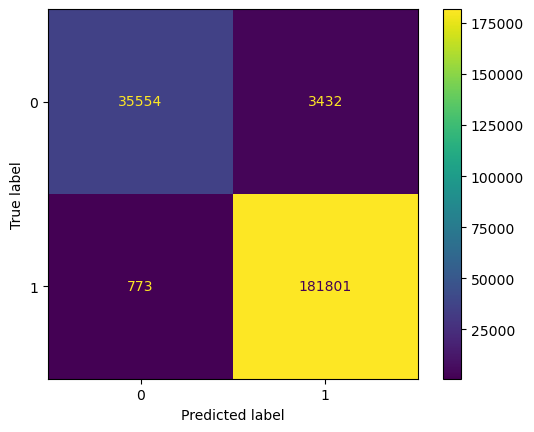

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_d, display_labels = [ '0','1'])
cm_display.plot()

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     38986
           1       0.98      1.00      0.99    182574

    accuracy                           0.98    221560
   macro avg       0.98      0.95      0.97    221560
weighted avg       0.98      0.98      0.98    221560

